In [1]:
#Dependencies
import random
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import tensorflow as tf

In [2]:
# Define model
x = tf.placeholder(tf.float32, [None, 2])

W_ih = tf.Variable(tf.random_uniform([2, 8], maxval=1))
b_ih = tf.Variable(tf.random_uniform([8], maxval=1))

h = tf.nn.relu(tf.matmul(x, W_ih) + b_ih)

W_ho = tf.Variable(tf.random_uniform([8,1], maxval=1))
b_ho = tf.Variable(tf.random_uniform([1], maxval=1))

y = tf.matmul(h, W_ho) + b_ho
result = tf.nn.sigmoid(y)

y_ = tf.placeholder(tf.float32, [None, 1])

cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y, labels=y_))

In [3]:
# Generate training- and test-dataset
inputvals = []
targetvals = []

for i in range(500):
    tx = random.random() * 2 - 1
    ty = random.random() * 2 - 1
    inputvals.append([tx,ty])
    if (tx > 0 and ty > 0) or (tx <= 0 and ty <= 0):
        targetvals.append([0])
    else:
        targetvals.append([1])
        
testinput = []
testtarget = []
for i in range(50):
    tx = random.random() * 2 - 1
    ty = random.random() * 2 - 1
    testinput.append([tx,ty])
    if (tx > 0 and ty > 0) or (tx <= 0 and ty <= 0):
        testtarget.append([0])
    else:
        testtarget.append([1])

In [4]:
# Define Optimizer and start running
train_step = tf.train.RMSPropOptimizer(0.25, momentum=0.5).minimize(cross_entropy)
init = tf.global_variables_initializer()

sess = tf.InteractiveSession()
sess.run(init)

for i in range(100001):
    if i%5000 == 0:
        te = cross_entropy.eval(feed_dict={x: testinput, y_:testtarget})
        print("step %d, training error %g"%(i, te))
        if te < 0.00001:
            break

    sess.run(train_step, feed_dict={x: inputvals, y_: targetvals})
print("Training complete!")

step 0, training error 1.46818
step 5000, training error 0.00241368
step 10000, training error 5.00042e-18
Training complete!


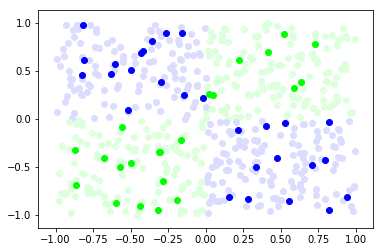

In [5]:
# Output results
res = sess.run(result, feed_dict={x: testinput})


for i in range(len(inputvals)):
    plt.scatter(inputvals[i][0], inputvals[i][1],c=('#dcdcff' if targetvals[i][0] == 1 else '#dcffdc'), label="Training data")

for i in range(len(testinput)):
    res1 = round(res[i][0])
    plt.scatter(testinput[i][0], testinput[i][1],c=('#0000ff' if res1 == 1 else '#00ff00'), label="Test data")

plt.show()